## Want to better understand the dimensionatlity of our scattering networks



In [48]:
from kymatio import Scattering2D
from sn_camels.models.models_factory import baseModelFactory, topModelFactory
import matplotlib.pyplot as plt

In [2]:
scattering_torch = Scattering2D(J=2, shape=(256, 256), frontend='torch')

In [8]:
filters=scattering_torch.load_filters()

In [28]:
len(filters[1])

16

In [34]:
filters[1][0].keys()

dict_keys(['j', 'theta', 0])

In [47]:
filters[1][4]["j"]

0

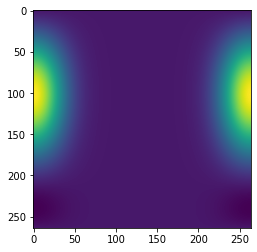

In [45]:
plt.imshow(filters[1][3][0])

/home/chris/.local/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


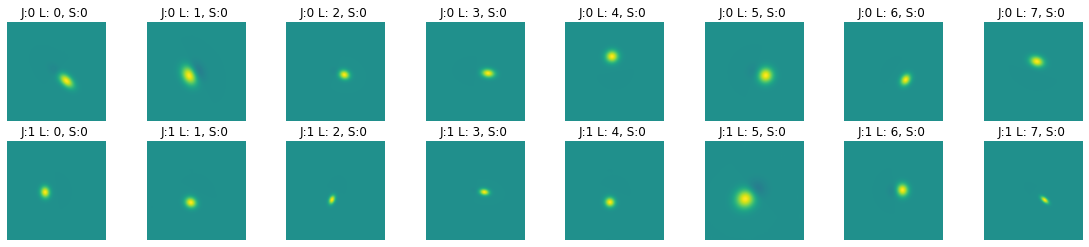

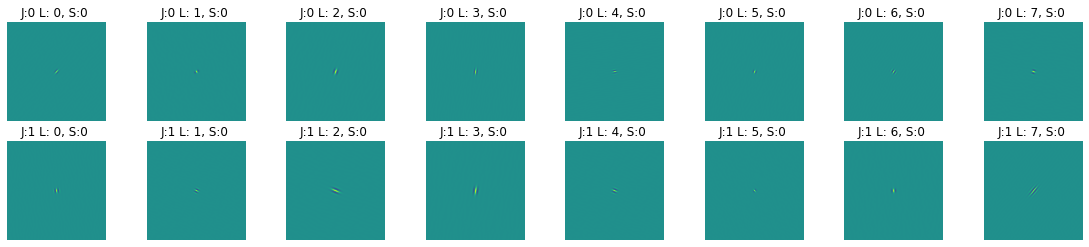

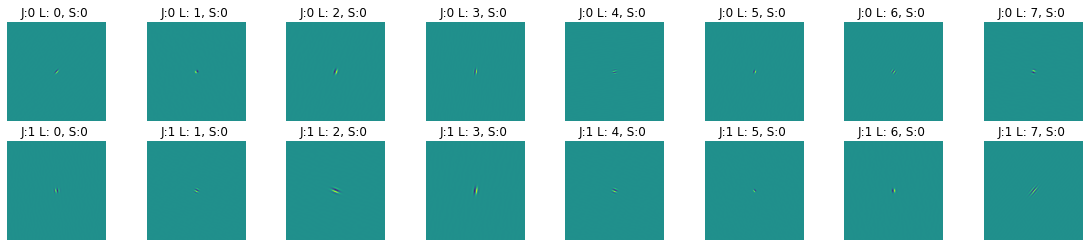

In [49]:
scatteringBase = baseModelFactory( #creat scattering base model
    architecture='scattering',
    J=2,
    N=256,
    M=256,
    second_order=True,
    initialization="Random",
    seed=123,
    learnable=False,
    lr_orientation=0.1,
    lr_scattering=0.1,
    filter_video=False,
    device="cpu",
    use_cuda=False
)

In [50]:
type(scatteringBase.scattering)

kymatio.scattering2d.frontend.torch_frontend.ScatteringTorch2D

In [51]:
filters_PSN=scatteringBase.scattering.load_filters()

In [54]:
len(filters_PSN[1])

16

In [60]:
for aa in range(len(filters_PSN[1])):
    print(filters[1][aa]["j"])
    print(filters_PSN[1][aa]["j"])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [63]:
len(scatteringBase.psi)

16

In [65]:
scatteringBase.psi[0].keys()

dict_keys(['j', 'theta', 0])

In [67]:
for aa,psi in enumerate(scatteringBase.psi):
    print(psi["j"])

0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


In [68]:
16*8

128

In [77]:
psi=scatteringBase.psi

second_order_count=0
before_cut=0

out_S_0, out_S_1, out_S_2 = [], [], []

for n1 in range(len(psi)):
    j1 = psi[n1]['j']
    theta1 = psi[n1]['theta']

    out_S_1.append({'j': (j1,),
                    'theta': (theta1,)})

    for n2 in range(len(psi)):
        j2 = psi[n2]['j']
        before_cut+=1
        if j2 <= j1:
            continue
        second_order_count+=1

In [74]:
second_order_count

64

In [75]:
second_order_count+16

80

In [78]:
before_cut

256